First few rows of the DataFrame:
   Time  Input  Output
0   0.0    320   496.0
1   0.5    310   496.5
2   1.0    300   496.5
3   1.5    290   496.0
4   2.0    280   495.0


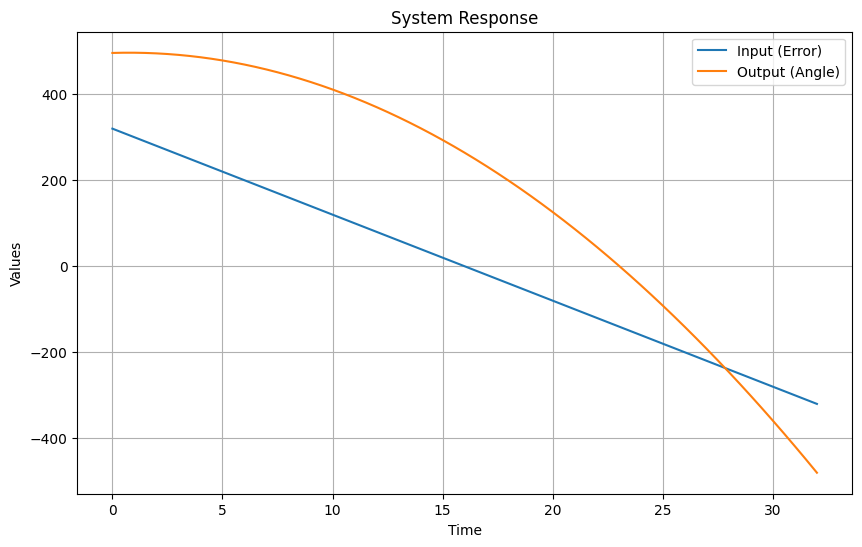

Data saved to system_response_data.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pid_sm import PIDController 

# Function to simulate the system response using the PID controller
def simulate_system_response(pid_controller, setpoint, object_centers):
    data = {'Time': [], 'Input': [], 'Output': []}

    for object_center in object_centers:

        error = setpoint - object_center
        output = pid_controller.update(error)

        # Simulate time increments of 0.5 seconds
        time_increment = 0.5
        data['Time'].append(len(data['Time']) * time_increment)
        data['Input'].append(error)
        data['Output'].append(output)

    return pd.DataFrame(data)

# Generate input values
object_centers = np.arange(0, 641, 10)

# Initialize the PID controller with initial parameters
pid_controller = PIDController(kP=1.5, kI=0.1, kD=0)
pid_controller.reset()

# Setpoint for all cases
setpoint = 320

# Simulate system response for all object center values
df = simulate_system_response(pid_controller, setpoint, object_centers)

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Input'], label='Input (Error)')
plt.plot(df['Time'], df['Output'], label='Output (Angle)')
plt.title('System Response')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Save the data to an Excel file
excel_filename = 'system_response_data.xlsx'
df.to_excel(excel_filename, index=False)

print(f'Data saved to {excel_filename}')
